# Q&A Activity- Week 10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the 
dataset.
2. Reset the index as "name".
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df = pd.read_csv('employee.csv')

In [3]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
df.shape

(9, 7)

In [5]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


## 2.Reset the index as "name".

In [7]:
df.set_index('name',drop = True,inplace =True)
df.index

Index(['Allen Smith', 'S Kumar', 'Jack Morgan', 'Ying Chin', 'Dheeraj Patel',
       'Satyam Sharma', 'James Authur', 'Josh Wills', 'Leo Duck'],
      dtype='object', name='name')

In [8]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3.Select rows for specific names Jack Morgan and Josh wills.

In [9]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4.Select data for multiple values "Sales" and “Finance”.

In [10]:
df[(df['department']=='Sales')| (df['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5.Display employee who has more than 700 performance score.

In [11]:
df[df['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6.Display employee who has more than 500 and less than 700 performance score

In [12]:
df[(df['performance_score'] > 500) & (df['performance_score'] <700) ]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7.Check and handle missing values in the dataset.

In [13]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:xlabel='grade', ylabel='age'>

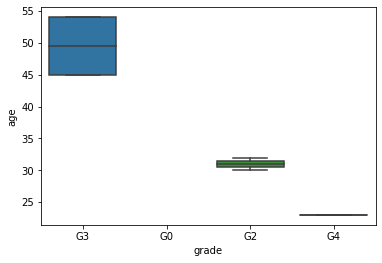

In [14]:
#check age and income variation with grade
sns.boxplot(data = df, y = 'age',x ='grade')

<AxesSubplot:xlabel='grade', ylabel='income'>

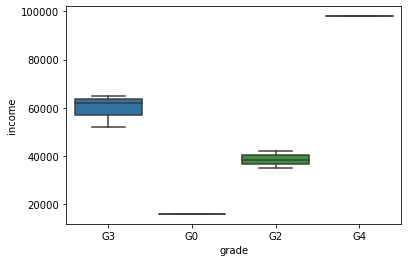

In [15]:
sns.boxplot(data = df, y = 'income', x ='grade')

Income and age varies with grade.Also there is no outliers in age and income.So will use mean to fill missing values.

In [16]:
df.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [17]:
df.groupby('grade')['age'].mean()

grade
G0     NaN
G2    31.0
G3    49.5
G4    23.0
Name: age, dtype: float64

In [18]:
df[df['income'].isna()]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
James Authur,54.0,NaN,F,Operations,G3,53


In [19]:
# use grade 3 mean to fill nan
g3mean = df.groupby('grade')['income'].mean()['G3']
df['income']= df['income'].fillna(g3mean)

In [20]:
df[df['age'].isna()]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [21]:
mean = df['age'].mean()
meang3 = df.groupby('grade')['age'].mean()['G3']
mean, meang3

(40.42857142857143, 49.5)

In [22]:
# for S Kumar, use mean age
df['age'] = df['age'].fillna(mean)
# For Satyam Sharma use mean G3 age.
df.loc['Satyam Sharma','age'] = meang3

In [23]:
#For gender,as there is only 2 nan, gender is not interpretable from the names.So will use mode.
df[df['gender'].isna()]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59666.666667,NaN,Operations,G3,723
Satyam Sharma,49.5,62000.000000,NaN,Sales,G3,649


In [24]:
gmode= df['gender'].mode()[0]

In [25]:
df['gender'] = df['gender'].fillna(gmode)

In [26]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## 7.Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

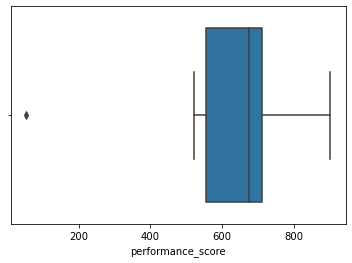

In [27]:
sns.boxplot(data =df, x ='performance_score')

In [28]:
df['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [29]:
# Cap outlier score to Q1-1.5*IQR
q1 = df['performance_score'].quantile(.25)
q3 = df['performance_score'].quantile(.75)
iqr = q3-q1
cap = q1-1.5*iqr
cap

323.5

In [30]:
df[df['performance_score']<cap]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,59666.666667,F,Operations,G3,53


In [31]:
df.loc[df['performance_score']<cap,'performance_score'] = cap

In [32]:
df.loc[['James Authur']]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,59666.666667,F,Operations,G3,323.5


<AxesSubplot:xlabel='performance_score'>

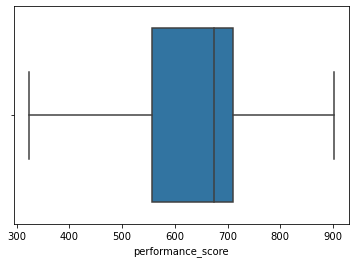

In [33]:
sns.boxplot(data =df, x ='performance_score')

## 9.Check the gender column and do Dummy encoding.

In [34]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [35]:
df = pd.get_dummies(df, columns =['gender'] ,drop_first =True)

In [36]:
df

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,59666.666667,Operations,G3,723.0,0
S Kumar,40.428571,16000.000000,Finance,G0,520.0,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674.0,1
Ying Chin,45.000000,65000.000000,Sales,G3,556.0,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711.0,0
Satyam Sharma,49.500000,62000.000000,Sales,G3,649.0,0
James Authur,54.000000,59666.666667,Operations,G3,323.5,0
Josh Wills,54.000000,52000.000000,Finance,G3,901.0,0
Leo Duck,23.000000,98000.000000,Sales,G4,709.0,1


## 10.Do the standard scaling on the feature performance score

In [37]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df['performance_score'] = sc.fit_transform(df[['performance_score']])
df

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,59666.666667,Operations,G3,0.541644,0
S Kumar,40.428571,16000.000000,Finance,G0,-0.794729,0
Jack Morgan,32.000000,35000.000000,Finance,G2,0.219072,1
Ying Chin,45.000000,65000.000000,Sales,G3,-0.557736,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,0.462647,0
Satyam Sharma,49.500000,62000.000000,Sales,G3,0.054494,0
James Authur,54.000000,59666.666667,Operations,G3,-2.088312,0
Josh Wills,54.000000,52000.000000,Finance,G3,1.713440,0
Leo Duck,23.000000,98000.000000,Sales,G4,0.449481,1
